# 基于TensorFlowTTS的新网语音合成baseline
Github: https://github.com/TensorSpeech/TensorflowTTS


2021“创青春·交子杯”新网银行金融科技挑战赛
11 月 1 日 周一 00:00 —— 2022-01-15 周六 00:00
线上
![](https://segmentfault.com/e/1160000040894935)
**报名地址**：https://segmentfault.com/e/1160000040894935

**扫码报名**：
![](https://img-blog.csdnimg.cn/601a244d004e4e109b49bff89f9fc349.png?x-oss-process=image/watermark,type_ZHJvaWRzYW5zZmFsbGJhY2s,shadow_50,text_Q1NETiBA6Ie0R3JlYXQ=,size_13,color_FFFFFF,t_70,g_se,x_16)

**官方qq交流群：740867621**
<!-- ![](https://img-blog.csdnimg.cn/ff190246b1764b639adad1c089e0d08c.jpg?x-oss-process=image/watermark,type_ZHJvaWRzYW5zZmFsbGJhY2s,shadow_50,text_Q1NETiBA6Ie0R3JlYXQ=,size_10,color_FFFFFF,t_70,g_se,x_16) -->

**提交地址**：https://ftc.xwbank.com/xwbank/competition-pc/index.html#/

作品提交规则：

1.每日最多可上传文件三次（成功提交记一次，失败提交不计次数)；每日最多可提交已上传文件一次；

2.每日上午9:00-12:00为最佳提交作品时间。建议“提早”上传、“错峰”上传，尽量避免在最后一天高峰期上传作品，以免提交或跑分失败影响比赛成绩；

3.不得超过200M，且格式只能为wav；

4.请上传16k样率音频，转换采样率命令 sox ‹原音频› -r 16000 ‹输出音频›。

5.请严格按照《新网AI比赛2021比赛方案》内的要求上传，若因格式错误造成的跑分失败，会占用当日作品提交次数

## 安装所需要的包
* TensorlowTTS:一个基于TensorFlow2的，支持最先进模型的、实时语音合成架构，如 Tacotron-2、Melgan、Multiband-Melgan、FastSpeech、FastSpeech2 
* german_transliterate：用于清理和音译（即规范化）文本，包括缩写，数字，时间戳等。GitHub地址：https://github.com/repodiac/german_transliterate

> 安装`TensorFlowTTS`的时候最好单独创建一个虚拟环境new_envs

In [1]:
!pip install TensorFlowTTS
!pip install git+https://github.com/repodiac/german_transliterate
!pip install h5py

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

  Running command git clone -q https://github.com/repodiac/german_transliterate 'C:\Users\yanqiang\AppData\Local\Temp\pip-req-build-e2gv8xtm'



  Cloning https://github.com/repodiac/german_transliterate to c:\users\yanqiang\appdata\local\temp\pip-req-build-e2gv8xtm
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 语音合成模型梳理

微软亚洲研究院的研究员们通过调研了450余篇语音合成领域的文献，发表了迄今为止语音合成领域几乎最详尽的综述论文 “A Survey on Neural Speech Synthesis”。在文中，研究员们还整理收集了语音合成领域的相关资源如数据集、开源实现、演讲教程等，同时也对语音合成领域未来的研究方向进行了探讨和展望。希望本文能对相关工作的研究人员提供具有价值的参考。

论文链接：https://arxiv.org/pdf/2106.15561.pdf

论文从两个方面对神经语音合成领域的发展现状进行了梳理总结（逻辑框架如图1所示）：

核心模块：分别从文本分析（textanalysis）、声学模型（acoustic model）、声码器（vocoder）、完全端到端模型（fully end-to-end model）等方面进行介绍。

进阶主题：分别从快速语音合成（fast TTS）、低资源语音合成（low-resourceTTS）、鲁棒语音合成（robust TTS）、富有表现力的语音合成（expressive TTS）、可适配语音合成（adaptive TTS）等方面进行介绍

![](https://inews.gtimg.com/newsapp_bt/0/13877198392/1000)

### TTS核心模块

研究员们根据神经语音合成系统的核心模块提出了一个分类体系。每个模块分别对应特定的数据转换流程：

1）文本分析模块将文本字符转换成音素或语言学特征；

2）声学模型将语言学特征、音素或字符序列转换成声学特征；

3）声码器将语言学特征或声学特征转换成语音波形；

4）完全端到端模型将字符或音素序列转换成语音波形。

图片：（a）TTS核心框架，（b）数据转换流程

![](https://inews.gtimg.com/newsapp_bt/0/13877198504/1000)
![](https://inews.gtimg.com/newsapp_bt/0/13877198505/1000)

#### 文本分析

文章总结了文本分析模块几个常见的任务，包括文本归一化、分词、词性标注、韵律预测、字形转音形以及多音字消歧等。
![](https://img-blog.csdnimg.cn/763f1e7cad134cff81967b2cf2662f98.png?x-oss-process=image/watermark,type_ZHJvaWRzYW5zZmFsbGJhY2s,shadow_50,text_Q1NETiBA6Ie0R3JlYXQ=,size_20,color_FFFFFF,t_70,g_se,x_16)

####  声学模式

在声学模型部分，文章首先简要介绍了在统计参数合成里用到的基于神经网络的声学模型，然后重点介绍了端到端模型的神经声学模型，包括基于 RNN、CNN 和Transformer 的声学模型以及其它基于 Flow、GAN、VAE、Diffusion 的声学模型。
![](https://inews.gtimg.com/newsapp_bt/0/13877198560/1000)

#### 声码器

声码器的发展分为两个阶段，包括传统参数合成里的声码器如 STRAIGHT和 WORLD，以及基于神经网络的声码器。论文重点介绍了基于神经网络的声码器，并把相关工作分为以下几类，包括：

1）自回归声码器（WaveNet，SampleRNN，WaveRNN，LPCNet 等）；

2）基于 Flow 的声码器（WaveGlow，FloWaveNet，WaveFlow，Par. WaveNet 等）；

3）基于 GAN 的声码器（WaveGAN，GAN-TTS，MelGAN，Par. WaveGAN，HiFi-GAN，VocGAN，GED，Fre-GAN 等）；

4）基于 VAE 的声码器（WaveVAE等）；

5）基于 Diffusion 的声码器（DiffWave，WaveGrad，PriorGrad 等）。
![](https://inews.gtimg.com/newsapp_bt/0/13877198562/1000)

#### 完全端到端模型

端到端模型的发展经历了以下几个阶段：

阶段0：在统计参数合成方法中，使用文本分析、声学模型和声码器三个模块级联；

阶段1：在统计参数合成方法中，将前两个模块合起来形成一个声学模型；

阶段2：直接从语言学特征生成最终的波形，例如 WaveNet；

阶段3：声学模型直接从字符或音素生成声学模型，然后利用神经声码器生成波形；

阶段4：完全端到端的神经网络模型。
![](https://inews.gtimg.com/newsapp_bt/0/13877198646/1000)

#### TTS模型分类

1）自回归 vs 非自回归；2）生成模型的类型；3）网络结构的类型。
![](https://inews.gtimg.com/newsapp_bt/0/13877198730/1000)

#### 模型演进
同时，本文还绘制了相关 TTS 工作随着时间变化的关系图，方便读者更直观地理解各个 TTS 模型及其在 TTS 发展中的位置。

![](https://inews.gtimg.com/newsapp_bt/0/13877198731/1000)

### TTS 进阶课题

研究员们还针对 TTS 面临的各种挑战，介绍了相关的进阶课题，包括快速语音合成（fast TTS）、低资源语音合成（low-resource TTS）、鲁棒语音合成（robust TTS）、富有表现力的语音合成（expressive TTS）、可适配语音合成（adaptive TTS）等。
![](https://inews.gtimg.com/newsapp_bt/0/13877198732/1000)

## 加载模型

In [2]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

import soundfile as sf
from tqdm import tqdm

### Tacotron2

Tacotron2是由Google Brain 2017年提出来的一个语音合成框架。

Tacotron2:一个完整神经网络语音合成方法。模型主要由三部分组成：

- 声谱预测网络：一个引入注意力机制（attention）的基于循环的Seq2seq的特征预测网络，用于从输入的字符序列预测梅尔频谱的帧序列。
- 声码器（vocoder）：一个WaveNet的修订版，用预测的梅尔频谱帧序列来生成时域波形样本。
- 中间连接层：使用低层次的声学表征-梅尔频率声谱图来衔接系统的两个部分。

<!-- ![](https://www.researchgate.net/publication/351104195/figure/fig1/AS:1019557095428112@1620092762992/Block-diagram-of-Tacotron2-based-TTS-reference-baseline-5.png) -->
![](https://img-blog.csdnimg.cn/img_convert/df289e69c1831fe8f7b2ba6236a8561c.png#shadow)

In [3]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-baker-ch", name="tacotron2")

### FastSpeech2


近年来，以 FastSpeech 为代表的非自回归语音合成（Text to Speech, TTS）模型相比传统的自回归模型（如 Tacotron 2）能极大提升合成速度，提升语音鲁棒性（减少重复吐词、漏词等问题）与可控性（控制速率和韵律），同时达到相匹配的语音合成质量。但是，FastSpeech 还面临以下几点问题：

FastSpeech 依赖 Teacher-Student 的知识蒸馏框架，训练流程比较复杂；
由于知识蒸馏，FastSpeech 的训练目标相比真实语音存在信息损失，同时从 Teacher 模型获得的时长（Duration）信息不够准确，两者都会影响合成语音质量。
为了解决上述问题，微软亚洲研究院和微软 Azure 语音团队联合浙江大学提出了FastSpeech 的改进版 FastSpeech 2，它抛弃了 Teacher-Student 知识蒸馏框架降低训练复杂度，直接用真实的语音数据作为训练目标避免信息损失，同时引入了更精确的时长信息和语音中的其它可变信息（包括音高（Pitch）和音量（Energy）等）来提高合成的语音质量。基于 FastSpeech 2，我们还提出了加强版 FastSpeech 2s 以支持完全端到端的从文本到语音波形的合成，省略了梅尔频谱的生成过程。实验结果表明，FastSpeech 2 和 2s 在语音质量方面优于 FastSpeech，同时大大简化了训练流程减少了训练时间，还加快了合成的速度。



![](https://www.msra.cn/wp-content/uploads/2020/06/fastspeech2-1.png)

FastSpeech 2 和 2s 的样例音频网址已经公开在：

https://speechresearch.github.io/fastspeech2/

论文公开在：https://arxiv.org/pdf/2006.04558.pdf


In [4]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-baker-ch", name="fastspeech2")

### MB-MelGAN

多频带MelGAN将Parallel WaveGAN中的多尺度短时傅里叶变换损失（multi-resolution STFT loss）引入到MelGAN中，并且在音频的多个子带上分别度量损失。

代码地址：

kan-bayashi/ParallelWaveGAN

rishikksh20/melgan

![](https://pic2.zhimg.com/v2-ed6949083f5eb64f5de8b2118c6c745c_1440w.jpg?source=172ae18b)

In [5]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-baker-ch", name="mb_melgan")

## 预测

基于标贝科技标注的数据集训练的中文语音合成模型

https://www.data-baker.com/open_source.html

数据集介绍：

    【中文标准女声音库】采集对象的音色风格知性阳光、亲切自然，专业标准普通话女声，听感乐观积极。录制环境为专业录音室和录音软件，录音环境和设备自始至终保持不变，录音环境的信噪比不低于35dB;单声道录音，用48KHz 16比特采样频率、PCM WAV格式。录音语料涵盖各类新闻、小说、科技、娱乐、对话等领域，语料设计综合语料样本量，力求在有限的语料数据量内，对音节音子、类型、音调、音连以及韵律等尽可能全面的覆盖。根据合成语音标注标准对音库进行文本音字校对、韵律层级标注、语音文件边界切分标注。

In [6]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-baker-ch")

In [7]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
    input_ids = processor.text_to_sequence(input_text, inference=True)

    # text2mel part
    if text2mel_name == "TACOTRON":
        _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
            tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
            tf.convert_to_tensor([len(input_ids)], tf.int32),
            tf.convert_to_tensor([0], dtype=tf.int32)
        )
    elif text2mel_name == "FASTSPEECH2":
        mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
            tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
            speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
            speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
            f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
            energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        )
    else:
        raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

    # vocoder part
    if vocoder_name == "MB-MELGAN":
        # tacotron-2 generate noise in the end symtematic, let remove it :v.
        if text2mel_name == "TACOTRON":
            remove_end = 1024
        else:
            remove_end = 1
        audio = vocoder_model.inference(mel_outputs)[0, :-remove_end, 0]
    else:
        raise ValueError("Only MB_MELGAN are supported on vocoder_name")

    if text2mel_name == "TACOTRON":
        return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
    else:
        return mel_outputs.numpy(), audio.numpy()


def visualize_attention(alignment_history):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_title(f'Alignment steps')
    im = ax.imshow(
        alignment_history,
        aspect='auto',
        origin='lower',
        interpolation='none')
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder timestep'
    plt.xlabel(xlabel)
    plt.ylabel('Encoder timestep')
    plt.tight_layout()
    plt.show()
    plt.close()


def visualize_mel_spectrogram(mels):
    mels = tf.reshape(mels, [-1, 80]).numpy()
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(311)
    ax1.set_title(f'Predicted Mel-after-Spectrogram')
    im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
    fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
    plt.show()
    plt.close()


In [8]:
input_text = "咀嚼着食物的味道，心里美滋滋的。"

In [9]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=5, win_back=5)

### Tacotron2 + MB-MelGAN

phoneme seq: sil zh e4 #0 sh iii4 #0 ^ i2 #0 g e4 #0 k ai1 #0 ^ van2 #0 d e5 #0 d uan1 #0 d ao4 #0 d uan1 #0 zh ong1 #0 ^ uen2 #0 ^ v3 #0 ^ in1 #0 h e2 #0 ch eng2 #0 x i4 #0 t ong3 sil


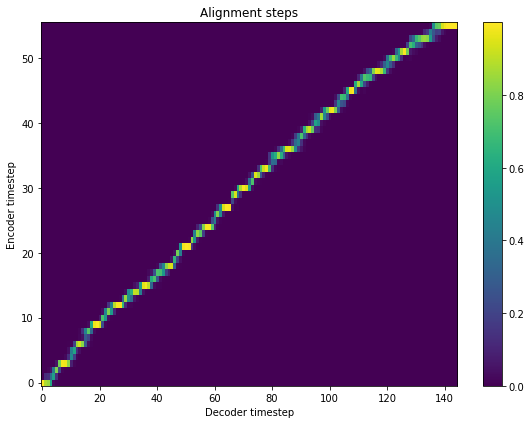

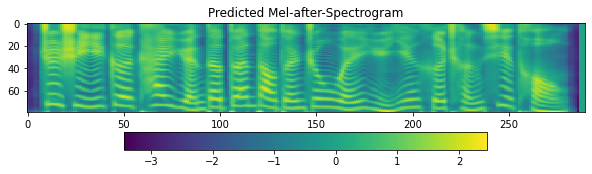

In [10]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=24000)

### FastSpeech2 + MB-MelGAN

phoneme seq: sil zh e4 #0 sh iii4 #0 ^ i2 #0 g e4 #0 k ai1 #0 ^ van2 #0 d e5 #0 d uan1 #0 d ao4 #0 d uan1 #0 zh ong1 #0 ^ uen2 #0 ^ v3 #0 ^ in1 #0 h e2 #0 ch eng2 #0 x i4 #0 t ong3 sil


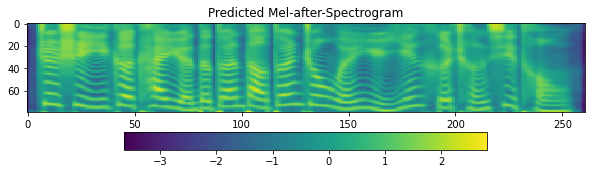

In [11]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=24000)

## 对Dev数据集进行预测

### 加载数据集

In [12]:
import pandas as pd

In [13]:
dev_path='data/dev.txt' # dev存放路径
tmp=[]
with open(dev_path,'r',encoding='utf-8') as f:
    for line in  f.readlines():
        tmp_data=line.strip().split()
        text_id=tmp_data[0]
        text="".join(tmp_data[1:])
        tmp.append([text_id,text])
dev_df=pd.DataFrame(tmp,columns=['id','text'])
dev_df.head()

,id,text
0,001,咀嚼着食物的味道，心里美滋滋的。
1,002,目前申请好人贷支持身份证原件实时拍摄或上传相册照片两种方式，但复印件及临时身份证是不可以的哟。
2,003,匈奴族首领单于只会骑马，不会骑单车。
3,004,"上暠暠以临月,下淫淫而愁雨。"
4,005,树前面插着铜牌，说明原由。此情此景，如不看铜牌的说明，绝对想不到巨树根底下还有一座宏伟的现代大楼。


In [14]:
dev_df.shape

(600, 2)

In [15]:
# 516 他反复叮嘱，“㖏”长得和“捏”“涅”差不多，但是读音不一样，一定不要出差错。

# 第516个样本在做拼音转换的时候会报错，可以直接在文件里修改这个样本为：
# 他反复叮嘱，捏长得和捏 捏差不多，但是读音不一样，一定不要出差错。

In [16]:
import os
team_name='致Great'
if not os.path.exists('result'):
    os.mkdir('result')
if not os.path.exists(f'result/{team_name}'):
    os.mkdir(f'result/{team_name}')
    
# team_name可以改成自己的名字

In [19]:
for index,row in dev_df.iterrows():
    try:
    #     print(index,row)
        mels, audios = do_synthesis(row['text'], fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
        # 保存文件
        dev_id=row['id']
        sf.write(
            file= f'result/{team_name}/{dev_id}.wav', 
            data=audios, 
            samplerate=16000,
            subtype='PCM_16'
        )
    except Exception as e:
        print(row['text'])

## 参考资料

https://www.msra.cn/zh-cn/news/features/neural-speech-synthesis-survey